In [33]:
from helpers.evaluation import  solutions_all_depths_all_folds_multiclass, get_evaluation_for_class,\
                                get_accuracy_every_depth, get_mcc_every_depth, plot_on_ax, plot_var_on_ax

import numpy as np
import matplotlib.pyplot as plt
import os

In [34]:
def get_figures_for_dataset(name_dataset, depth_tree, desired_target_var, amount_metrics, target_vars_list, target_vars_dict, folds, get_in_sample_results = False):

    dir_path = f'results/{name_dataset}'


    #get results:
    result_dict_rollOCT = solutions_all_depths_all_folds_multiclass(dataset_name=name_dataset, list_target_vars = target_vars_list, max_tree_depth=depth_tree, folds_available=folds, cart=False)
    result_dict_cart = solutions_all_depths_all_folds_multiclass(dataset_name=name_dataset, list_target_vars = target_vars_list, max_tree_depth=depth_tree, folds_available=folds, cart=True)

    accuracy_rollOCT = get_accuracy_every_depth(result_dict_rollOCT, depth=depth_tree) #get acc for every depth; out of sample and in sample
    mcc_rollOCT = get_mcc_every_depth(result_dict_rollOCT, depth=depth_tree) #get mcc for every depth; out of sample and in sample

    accuracy_cart = get_accuracy_every_depth(result_dict_cart, depth=depth_tree) #get acc
    mcc_cart = get_mcc_every_depth(result_dict_cart, depth=depth_tree) #get mcc

    if get_in_sample_results == False: 
        var = 'test'
    else:
        var = 'train'

    # Create the directory if it doesn't exist
    os.makedirs(f'{dir_path}/figures/{var}/{desired_target_var}', exist_ok=True)

    accuracy_rollOCT = accuracy_rollOCT[var]
    mcc_rollOCT = mcc_rollOCT[var]
    accuracy_cart = accuracy_cart[var]
    mcc_cart = mcc_cart[var]

    eval_rollOCT = get_evaluation_for_class(result_dict_rollOCT, target_var=desired_target_var, depth=depth_tree, training_data = get_in_sample_results) #get sensitivity, specificity, precision, f1 for chosen target var over all depths
    eval_cart = get_evaluation_for_class(result_dict_cart, target_var=desired_target_var, depth=depth_tree, training_data = get_in_sample_results)

    bar_width = 0.25

    categories = []
    for i in range(2,depth_tree+1):
        categories.append(i)

    # Positions of the bars on x-axis for the groups
    x = np.arange(len(categories))

    fig, axes = plt.subplots(1, 2, figsize=(10, 5))
    ax = axes.ravel()
    plot_on_ax(ax[0], x, categories, bar_width, dataset_var_rollOCT = accuracy_rollOCT, dataset_var_cart = accuracy_cart, dataset_name = name_dataset, metric_name = 'accuracy', metric_short = 'acc', train=get_in_sample_results) #accuracy
    plot_on_ax(ax[1], x, categories, bar_width, dataset_var_rollOCT = mcc_rollOCT, dataset_var_cart = mcc_cart, dataset_name = name_dataset, metric_name = 'Matthews Correlation Coefficient',metric_short = 'mcc', train=get_in_sample_results) #mcc
    fig.tight_layout()
    fig.savefig(os.path.join(f'{dir_path}/figures/{var}', 'acc_mcc.png'))

    fig, axes = plt.subplots(2, 2, figsize=(10, 5))
    ax = axes.ravel()
    plot_var_on_ax(ax[0], x, categories, bar_width, dataset_var_rollOCT = eval_rollOCT['sensitivity'], dataset_var_cart = eval_cart['sensitivity'], dataset_name = 'adult', metric_name = 'sensitivity',metric_short = 'sens', target_var=target_vars_dict[desired_target_var] ,train=get_in_sample_results) #sensitivity
    plot_var_on_ax(ax[1], x, categories, bar_width, dataset_var_rollOCT = eval_rollOCT['specificity'], dataset_var_cart = eval_cart['specificity'], dataset_name = 'adult',metric_name = 'specificity',metric_short = 'spec', target_var=target_vars_dict[desired_target_var], train=get_in_sample_results) #specificity
    plot_var_on_ax(ax[2], x, categories, bar_width, dataset_var_rollOCT = eval_rollOCT['precision'], dataset_var_cart = eval_cart['precision'], dataset_name = 'adult',metric_name = 'precision',metric_short = 'prec',target_var=target_vars_dict[desired_target_var], train=get_in_sample_results) #precision
    plot_var_on_ax(ax[3], x, categories, bar_width, dataset_var_rollOCT = eval_rollOCT['f1'], dataset_var_cart = eval_cart['f1'], dataset_name = 'adult',metric_name = 'f1',metric_short = 'f1',target_var=target_vars_dict[desired_target_var], train=get_in_sample_results) #f1

    fig.tight_layout()
    fig.savefig(os.path.join(f'{dir_path}/figures/{var}/{desired_target_var}', 'sens_spec_prec_f1.png'))

In [35]:
depth_tree = 8
metrics = 6
folds_available = 10
get_in_sample_results = False

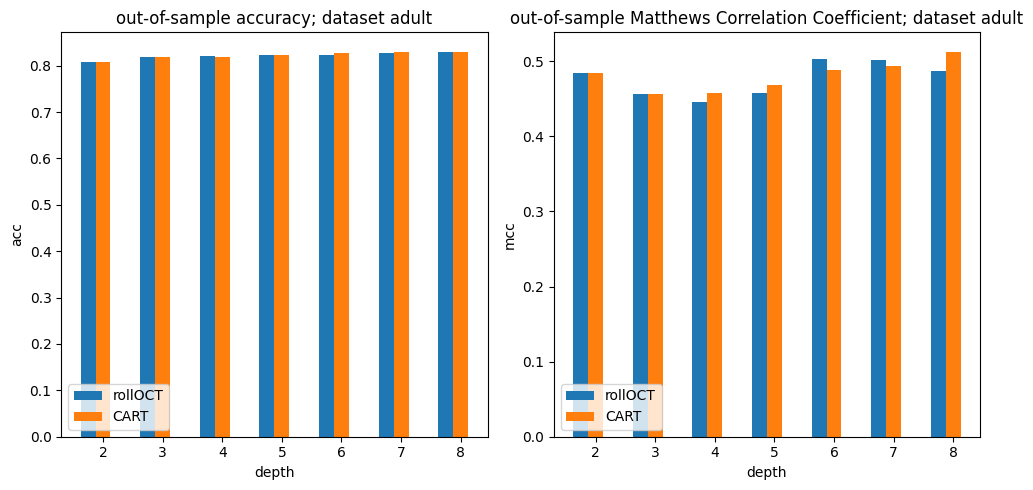

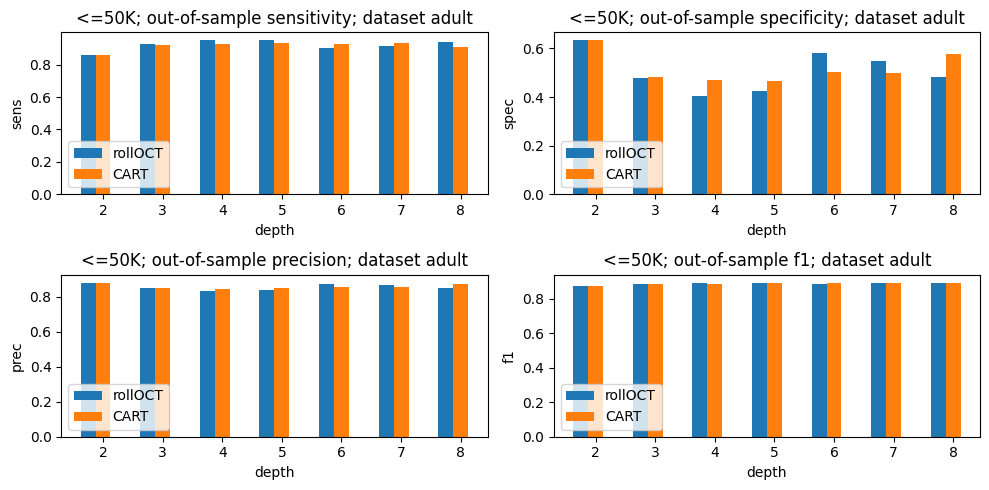

In [36]:
name_dataset = 'adult'

#muss nachgeschaut werden:
meaning_target_vars = {
    1 : '<=50K',
    2 : '>50K'
}

target_vars = [1,2]
desired_target_var = 1

get_figures_for_dataset(name_dataset=name_dataset, depth_tree = depth_tree, desired_target_var= desired_target_var, amount_metrics = metrics, target_vars_list = target_vars, target_vars_dict = meaning_target_vars, folds = folds_available, get_in_sample_results = get_in_sample_results)